# TMDB Movie Dataset EDA, Modeling, and Recommender System


In [1]:
# Disable warnings
import warnings

warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    BaggingClassifier,
    ExtraTreesClassifier,
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score,
    classification_report,
)
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
import os

## 1. Data Loading and Gain Info


In [3]:
df_credits = pd.read_csv("Dataset/tmdb_5000_credits.csv")
df_movies = pd.read_csv("Dataset/tmdb_5000_movies.csv")

In [4]:
df_credits.head().T

,0,1,2,3,4
movie_id,19995,285,206647,49026,49529
title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,John Carter
cast,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c..."
crew,"[{""credit_id"": ""52fe48009251416c750aca23"", ""de...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [5]:
df_movies.head().T

,0,1,2,3,4
budget,237000000,300000000,245000000,250000000,260000000
genres,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
homepage,http://www.avatarmovie.com/,http://disney.go.com/disneypictures/pirates/,http://www.sonypictures.com/movies/spectre/,http://www.thedarkknightrises.com/,http://movies.disney.com/john-carter
id,19995,285,206647,49026,49529
keywords,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":..."
original_language,en,en,en,en,en
original_title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,John Carter
overview,"In the 22nd century, a paraplegic Marine is di...","Captain Barbossa, long believed to be dead, ha...",A cryptic message from Bond’s past sends him o...,Following the death of District Attorney Harve...,"John Carter is a war-weary, former military ca..."
popularity,150.437577,139.082615,107.376788,112.31295,43.926995
production_companies,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]"


In [6]:
# Check for Joining Key
(df_credits.movie_id != df_movies.id).any().sum()
# 0 means we can join the two dataframes on movie_id

0

In [7]:
df = df_movies.merge(
    df_credits, left_on="id", right_on="movie_id", suffixes=("_movies", "_credits")
)
df.drop(["id"], axis=1, inplace=True)
df.head().T

,0,1,2,3,4
budget,237000000,300000000,245000000,250000000,260000000
genres,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
homepage,http://www.avatarmovie.com/,http://disney.go.com/disneypictures/pirates/,http://www.sonypictures.com/movies/spectre/,http://www.thedarkknightrises.com/,http://movies.disney.com/john-carter
keywords,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":..."
original_language,en,en,en,en,en
original_title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,John Carter
overview,"In the 22nd century, a paraplegic Marine is di...","Captain Barbossa, long believed to be dead, ha...",A cryptic message from Bond’s past sends him o...,Following the death of District Attorney Harve...,"John Carter is a war-weary, former military ca..."
popularity,150.437577,139.082615,107.376788,112.31295,43.926995
production_companies,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]"
production_countries,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_3166_1"": ""US"", ""name"": ""United States o..."


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   keywords              4803 non-null   object 
 4   original_language     4803 non-null   object 
 5   original_title        4803 non-null   object 
 6   overview              4800 non-null   object 
 7   popularity            4803 non-null   float64
 8   production_companies  4803 non-null   object 
 9   production_countries  4803 non-null   object 
 10  release_date          4802 non-null   object 
 11  revenue               4803 non-null   int64  
 12  runtime               4801 non-null   float64
 13  spoken_languages      4803 non-null   object 
 14  status                4803 non-null   object 
 15  tagline              

In [9]:
# Drop columns that are not useful
df.drop(["homepage", "status", "production_countries"], axis=1, inplace=True)

In [10]:
# Replace overview and tagline NaN with empty string
df["overview"].fillna("", inplace=True)
df["tagline"].fillna("", inplace=True)
# Replace runtime NaN with median
df["runtime"].fillna(df["runtime"].median(), inplace=True)
# Replace release_date NaN with 1st January 2000
df["release_date"].fillna("2000-01-01", inplace=True)
# Find missing values
df.isnull().sum()

budget                  0
genres                  0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
tagline                 0
title_movies            0
vote_average            0
vote_count              0
movie_id                0
title_credits           0
cast                    0
crew                    0
dtype: int64

## 2. Data cleaning and Preprocessing


In [11]:
# Convert JSON columns to list
import json


def convert_json_to_list(df, columns):
    for column in columns:
        df[column] = df[column].apply(json.loads)
    return df


df = convert_json_to_list(
    df,
    ["genres", "keywords", "production_companies", "spoken_languages", "cast", "crew"],
)

df.head().T

,0,1,2,3,4
budget,237000000,300000000,245000000,250000000,260000000
genres,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
keywords,"[{'id': 1463, 'name': 'culture clash'}, {'id':...","[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...","[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...","[{'id': 849, 'name': 'dc comics'}, {'id': 853,...","[{'id': 818, 'name': 'based on novel'}, {'id':..."
original_language,en,en,en,en,en
original_title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,John Carter
overview,"In the 22nd century, a paraplegic Marine is di...","Captain Barbossa, long believed to be dead, ha...",A cryptic message from Bond’s past sends him o...,Following the death of District Attorney Harve...,"John Carter is a war-weary, former military ca..."
popularity,150.437577,139.082615,107.376788,112.31295,43.926995
production_companies,"[{'name': 'Ingenious Film Partners', 'id': 289...","[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{'name': 'Walt Disney Pictures', 'id': 2}]"
release_date,2009-12-10,2007-05-19,2015-10-26,2012-07-16,2012-03-07
revenue,2787965087,961000000,880674609,1084939099,284139100


In [12]:
# Convert [{""id"": 12, ""name"": ""Adventure""}] to [Adventure]
def convert_json_to_list(df, columns, key="name", limit=5):
    """
    Convert JSON columns to list of values
    Just keep the first 5 values
    """
    for column in columns:
        if df[column][0] and key in df[column][0][0]:
            df[column] = df[column].apply(lambda x: [i[key] for i in x][:limit])
    return df


def director_and_producer(df):
    df["crew"] = df["crew"].apply(
        lambda x: [
            i["name"] for i in x if i["job"] == "Director" or i["job"] == "Producer"
        ]
    )
    return df


df = convert_json_to_list(
    df, ["genres", "keywords", "production_companies", "spoken_languages", "cast"]
)
df = director_and_producer(df)

In [13]:
df.head().T

,0,1,2,3,4
budget,237000000,300000000,245000000,250000000,260000000
genres,"[Action, Adventure, Fantasy, Science Fiction]","[Adventure, Fantasy, Action]","[Action, Adventure, Crime]","[Action, Crime, Drama, Thriller]","[Action, Adventure, Science Fiction]"
keywords,"[culture clash, future, space war, space colon...","[ocean, drug abuse, exotic island, east india ...","[spy, based on novel, secret agent, sequel, mi6]","[dc comics, crime fighter, terrorist, secret i...","[based on novel, mars, medallion, space travel..."
original_language,en,en,en,en,en
original_title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,John Carter
overview,"In the 22nd century, a paraplegic Marine is di...","Captain Barbossa, long believed to be dead, ha...",A cryptic message from Bond’s past sends him o...,Following the death of District Attorney Harve...,"John Carter is a war-weary, former military ca..."
popularity,150.437577,139.082615,107.376788,112.31295,43.926995
production_companies,"[Ingenious Film Partners, Twentieth Century Fo...","[Walt Disney Pictures, Jerry Bruckheimer Films...","[Columbia Pictures, Danjaq, B24]","[Legendary Pictures, Warner Bros., DC Entertai...",[Walt Disney Pictures]
release_date,2009-12-10,2007-05-19,2015-10-26,2012-07-16,2012-03-07
revenue,2787965087,961000000,880674609,1084939099,284139100


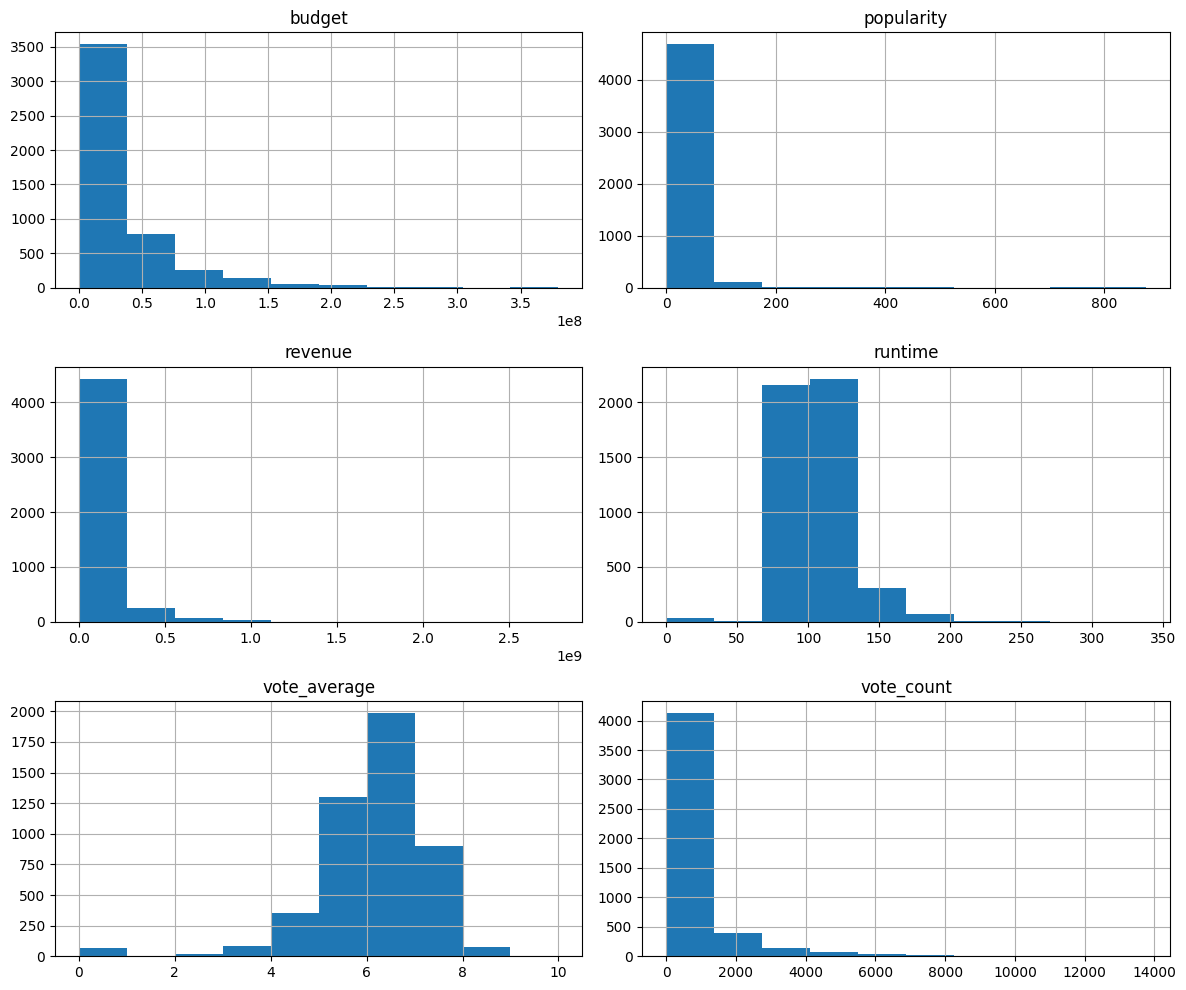

In [14]:
numerical_features = df.select_dtypes(include=["int64", "float64"]).columns.drop(
    "movie_id"
)
df[numerical_features].hist(figsize=(12, 10))

plt.tight_layout()
plt.show()

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
budget,4803.0,2.904504e+07,4.072239e+07,0.0,790000.00000,1.500000e+07,4.000000e+07,3.800000e+08
popularity,4803.0,2.149230e+01,3.181665e+01,0.0,4.66807,1.292159e+01,2.831350e+01,8.755813e+02
revenue,4803.0,8.226064e+07,1.628571e+08,0.0,0.00000,1.917000e+07,9.291719e+07,2.787965e+09
runtime,4803.0,1.068742e+02,2.260736e+01,0.0,94.00000,1.030000e+02,1.175000e+02,3.380000e+02
vote_average,4803.0,6.092172e+00,1.194612e+00,0.0,5.60000,6.200000e+00,6.800000e+00,1.000000e+01
vote_count,4803.0,6.902180e+02,1.234586e+03,0.0,54.00000,2.350000e+02,7.370000e+02,1.375200e+04
movie_id,4803.0,5.716548e+04,8.869461e+04,5.0,9014.50000,1.462900e+04,5.861050e+04,4.594880e+05


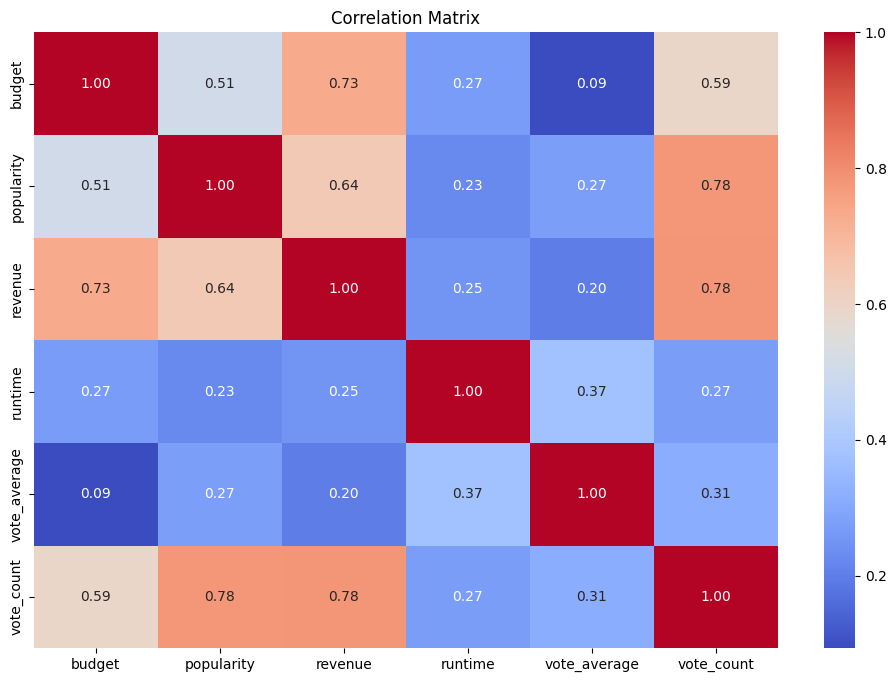

In [16]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [17]:
df

,budget,genres,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,title_movies,vote_average,vote_count,movie_id,title_credits,cast,crew
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...",2009-12-10,2787965087,162.0,"[English, Español]",Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[James Cameron, James Cameron, Jon Landau]"
1,300000000,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",2007-05-19,961000000,169.0,[English],"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[Gore Verbinski, Jerry Bruckheimer, Eric McLeo..."
2,245000000,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi6]",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]",2015-10-26,880674609,148.0,"[Français, English, Español, Italiano, Deutsch]",A Plan No One Escapes,Spectre,6.3,4466,206647,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[Sam Mendes, Barbara Broccoli, Michael G. Wilson]"
3,250000000,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",2012-07-16,1084939099,165.0,[English],The Legend Ends,The Dark Knight Rises,7.6,9106,49026,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman, A...","[Charles Roven, Christopher Nolan, Christopher..."
4,260000000,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],2012-03-07,284139100,132.0,[English],"Lost in our world, found in another.",John Carter,6.1,2124,49529,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[Andrew Stanton, Colin Wilson, Jim Morris, Lin..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[Action, Crime, Thriller]","[united states–mexico barrier, legs, arms, pap...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,[Columbia Pictures],1992-09-04,2040920,81.0,[Español],"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,9367,El Mariachi,"[Carlos Gallardo, Jaime de Hoyos, Peter Marqua...","[Robert Rodriguez, Robert Rodriguez, Carlos Ga..."
4799,9000,"[Comedy, Romance]",[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],2011-12-26,0,85.0,[],A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,72766,Newlyweds,"[Edward Burns, Kerry Bishé, Marsha Dietlein, C...","[Edward Burns, Edward Burns, William Rexer, Aa..."
4800,0,"[Comedy, Drama, Romance, TV Movie]","[date, love at first sight, narration, investi...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[Front Street Pictures, Muse Entertainment Ent...",2013-10-13,0,120.0,[English],,"Signed, Sealed, Delivered",7.0,6,231617,"Signed, Sealed, Delivered","[Eric Mabius, Kristin Booth, Crystal Lowe, Geo...","[Harvey Kahn, Scott Smith]"
4801,0,[],[],en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,[],2012-05-03,0,98.0,[English],A New Yorker in Shanghai,Shanghai Calling,5.7,7,126186,Shanghai Calling,"[Daniel Henney, Eliza Coupe, Bill Paxton, Alan...",[Danie

## 4. Data Modeling (Using different ML models)


In [18]:
# Add feature 'profitable'
df["profitable"] = df["revenue"] > df["budget"]

# How many movies are profitable?
df["profitable"].value_counts()

profitable
True     2585
False    2218
Name: count, dtype: int64

In [19]:
# Feature selection
# Select numerical features
column_X = df.select_dtypes(include=["int64", "float64"]).drop(
    ["movie_id", "revenue"], axis=1
).columns
print(column_X)

Index(['budget', 'popularity', 'runtime', 'vote_average', 'vote_count'], dtype='object')


In [20]:
# Split the data into X and y
X = df[column_X]
y = df["profitable"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [21]:
def analyze_model(model, X_train, y_train, X_test, y_test):
    # Start a timer
    start = time.time()
    print("\n", "=" * 50, sep="")
    print(model.__class__.__name__)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred))

    accuracy = round(accuracy_score(y_test, y_pred), 3)
    precision = round(precision_score(y_test, y_pred), 3)
    recall = round(recall_score(y_test, y_pred), 3)
    f1 = round(f1_score(y_test, y_pred), 3)
    
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

    roc_auc = round(roc_auc_score(y_test, y_pred_proba), 3)
    print("ROC AUC Score:", roc_auc)
    
    plt.plot([0, 1], [0, 1], "k--")
    plt.plot(fpr, tpr, label=model.__class__.__name__)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(model.__class__.__name__ + " ROC Curve")
    plt.show()
    
    print("Run Time:", round(time.time() - start, 2), "s")
    print("=" * 50, "\n")

    return accuracy, precision, recall, f1, roc_auc



LogisticRegression
              precision    recall  f1-score   support

       False       0.73      0.84      0.78       444
        True       0.84      0.73      0.78       517

    accuracy                           0.78       961
   macro avg       0.79      0.79      0.78       961
weighted avg       0.79      0.78      0.78       961

Accuracy: 0.784
Precision: 0.844
Recall: 0.733
F1 Score: 0.785
ROC AUC Score: 0.846


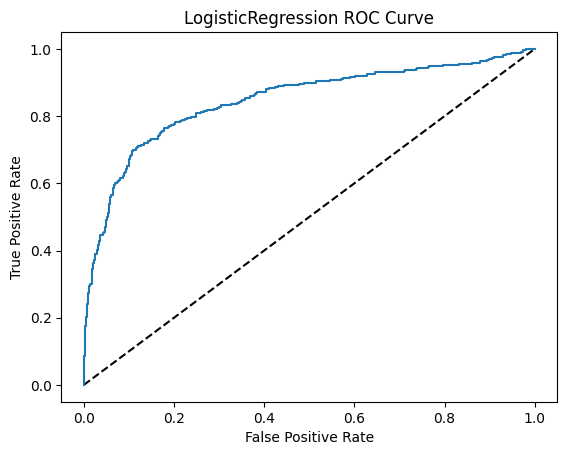

Run Time: 0.63 s


DecisionTreeClassifier
              precision    recall  f1-score   support

       False       0.70      0.67      0.69       444
        True       0.73      0.76      0.74       517

    accuracy                           0.72       961
   macro avg       0.72      0.71      0.71       961
weighted avg       0.72      0.72      0.72       961

Accuracy: 0.717
Precision: 0.727
Recall: 0.758
F1 Score: 0.742
ROC AUC Score: 0.714


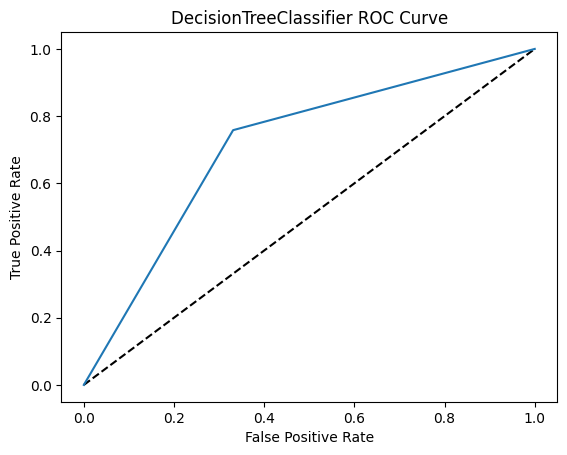

Run Time: 0.13 s


RandomForestClassifier
              precision    recall  f1-score   support

       False       0.78      0.77      0.78       444
        True       0.81      0.82      0.81       517

    accuracy                           0.80       961
   macro avg       0.79      0.79      0.79       961
weighted avg       0.79      0.80      0.79       961

Accuracy: 0.795
Precision: 0.805
Recall: 0.816
F1 Score: 0.811
ROC AUC Score: 0.863


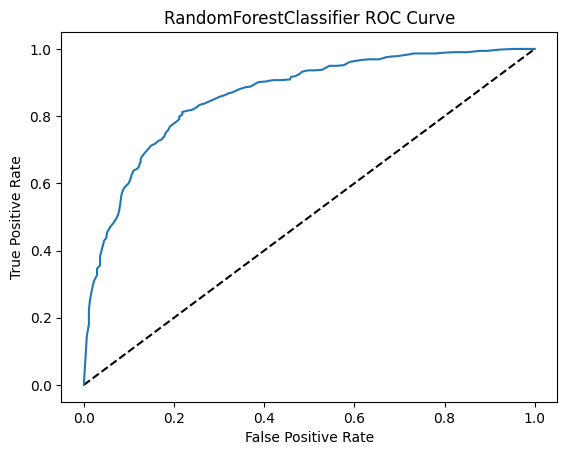

Run Time: 0.45 s


XGBClassifier
              precision    recall  f1-score   support

       False       0.77      0.75      0.76       444
        True       0.79      0.81      0.80       517

    accuracy                           0.78       961
   macro avg       0.78      0.78      0.78       961
weighted avg       0.78      0.78      0.78       961

Accuracy: 0.78
Precision: 0.788
Recall: 0.81
F1 Score: 0.799
ROC AUC Score: 0.854


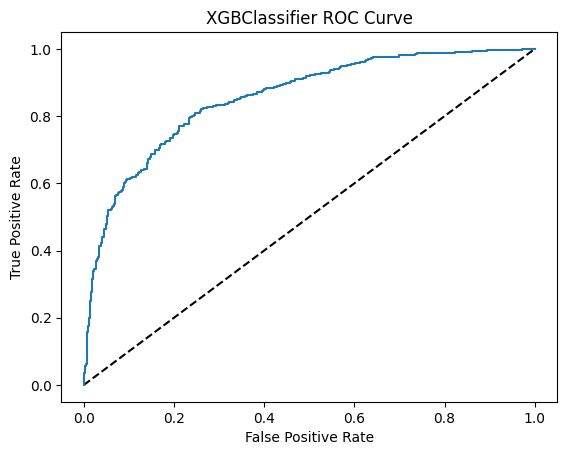

Run Time: 0.26 s


KNeighborsClassifier
              precision    recall  f1-score   support

       False       0.77      0.72      0.75       444
        True       0.77      0.82      0.79       517

    accuracy                           0.77       961
   macro avg       0.77      0.77      0.77       961
weighted avg       0.77      0.77      0.77       961

Accuracy: 0.772
Precision: 0.773
Recall: 0.816
F1 Score: 0.794
ROC AUC Score: 0.823


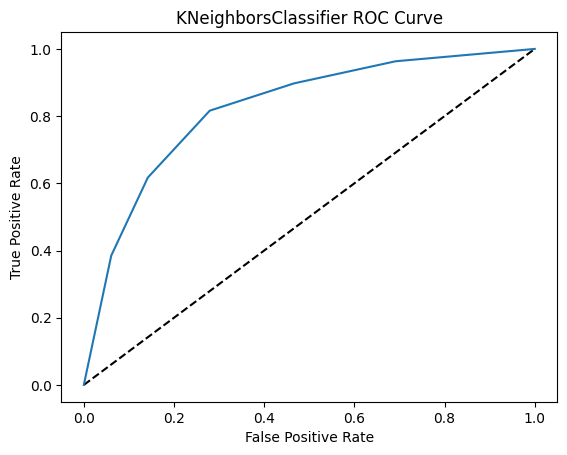

Run Time: 0.09 s


GradientBoostingClassifier
              precision    recall  f1-score   support

       False       0.79      0.76      0.77       444
        True       0.80      0.82      0.81       517

    accuracy                           0.79       961
   macro avg       0.79      0.79      0.79       961
weighted avg       0.79      0.79      0.79       961

Accuracy: 0.793
Precision: 0.799
Recall: 0.822
F1 Score: 0.81
ROC AUC Score: 0.875


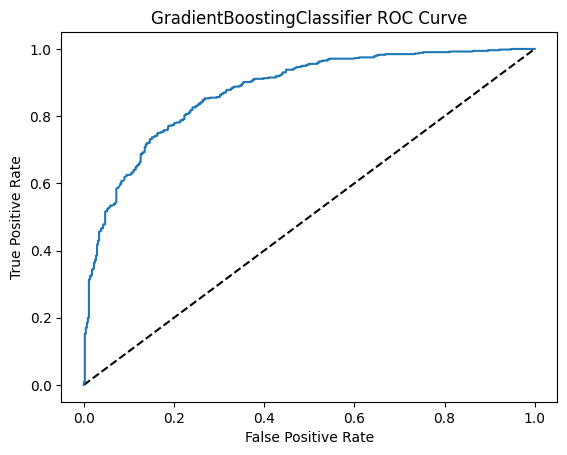

Run Time: 0.41 s


AdaBoostClassifier
              precision    recall  f1-score   support

       False       0.78      0.76      0.77       444
        True       0.80      0.82      0.81       517

    accuracy                           0.79       961
   macro avg       0.79      0.79      0.79       961
weighted avg       0.79      0.79      0.79       961

Accuracy: 0.791
Precision: 0.799
Recall: 0.816
F1 Score: 0.808
ROC AUC Score: 0.867


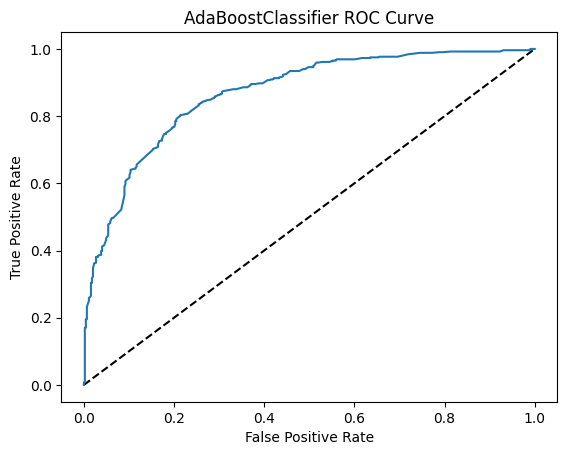

Run Time: 0.17 s


BaggingClassifier
              precision    recall  f1-score   support

       False       0.74      0.77      0.75       444
        True       0.80      0.77      0.78       517

    accuracy                           0.77       961
   macro avg       0.77      0.77      0.77       961
weighted avg       0.77      0.77      0.77       961

Accuracy: 0.769
Precision: 0.796
Recall: 0.768
F1 Score: 0.781
ROC AUC Score: 0.834


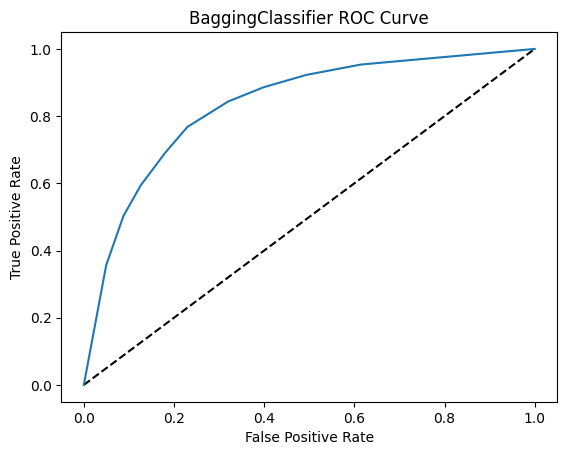

Run Time: 0.14 s


ExtraTreesClassifier
              precision    recall  f1-score   support

       False       0.78      0.74      0.76       444
        True       0.79      0.82      0.80       517

    accuracy                           0.78       961
   macro avg       0.78      0.78      0.78       961
weighted avg       0.78      0.78      0.78       961

Accuracy: 0.783
Precision: 0.786
Recall: 0.818
F1 Score: 0.802
ROC AUC Score: 0.858


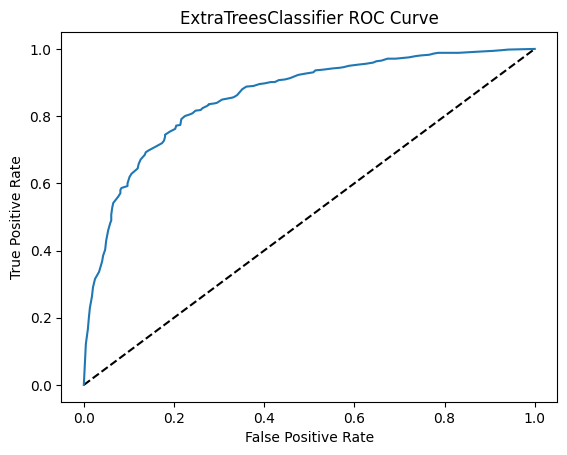

Run Time: 0.3 s



,Model,Accuracy,Precision,Recall,F1,ROC AUC
5,GradientBoostingClassifier,0.793,0.799,0.822,0.810,0.875
6,AdaBoostClassifier,0.791,0.799,0.816,0.808,0.867
2,RandomForestClassifier,0.795,0.805,0.816,0.811,0.863
8,ExtraTreesClassifier,0.783,0.786,0.818,0.802,0.858
3,XGBClassifier,0.780,0.788,0.810,0.799,0.854
0,LogisticRegression,0.784,0.844,0.733,0.785,0.846
7,BaggingClassifier,0.769,0.796,0.768,0.781,0.834
4,KNeighborsClassifier,0.772,0.773,0.816,0.794,0.823
1,DecisionTreeClassifier,0.717,0.727,0.758,0.742,0.714


In [22]:
# Test different models
# Logistic Regression, Decision Tree, Random Forest, 
# XGBoost, KNN, Gradient Boosting, AdaBoost, Bagging, Extra Trees
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
    KNeighborsClassifier(),
    GradientBoostingClassifier(random_state=42),
    AdaBoostClassifier(random_state=42),
    BaggingClassifier(random_state=42),
    ExtraTreesClassifier(random_state=42),
]
analyzes = []
for model in models:
    accuracy, precision, recall, f1, roc_auc = analyze_model(
        model, X_train, y_train, X_test, y_test
    )
    analyzes.append(
        {
            "Model": model.__class__.__name__,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1": f1,
            "ROC AUC": roc_auc,
        }
    )

# Print the results in a table
results = pd.DataFrame(analyzes).sort_values(by="ROC AUC", ascending=False)
results

## 6. Recommender System

In [24]:
# Import tfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer
tfidf = TfidfVectorizer(stop_words="english")

# Fit and transform the vectorizer on the overview text
tfidf_matrix = tfidf.fit_transform(df["overview"])

# Output the shape of tfidf_matrix
tfidf_matrix.shape



(4803, 20978)

Convert the names and keyword instances into lowercase and strip all the spaces between them. This is done so that our vectorizer doesn't count the Johnny of "Johnny Depp" and "Johnny Galecki" as the same.

In [27]:
def change_string(s):
    # Check if the value is a list
    if isinstance(s, list):
        return [i.lower().replace(" ", "") for i in s]
    # If the value is a string, return lower case and remove spaces
    elif isinstance(s, str):
        return s.lower().replace(" ", "")
    else:
        return ""
    
# Apply the function to your series
features = ["cast", "crew"]
for feature in features:
    df[feature] = df[feature].apply(change_string)

# Function to create a soup of features
def create_soup(x):
    return " ".join(x["keywords"]) + " " + " ".join(x["cast"]) + " " + " ".join(x["crew"]) + " " + " ".join(x["genres"]) 

,budget,genres,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,...,spoken_languages,tagline,title_movies,vote_average,vote_count,movie_id,title_credits,cast,crew,profitable
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...",2009-12-10,2787965087,...,"[English, Español]",Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[samworthington, zoesaldana, sigourneyweaver, ...","[jamescameron, jamescameron, jonlandau]",True
1,300000000,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",2007-05-19,961000000,...,[English],"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[johnnydepp, orlandobloom, keiraknightley, ste...","[goreverbinski, jerrybruckheimer, ericmcleod, ...",True
2,245000000,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi6]",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]",2015-10-26,880674609,...,"[Français, English, Español, Italiano, Deutsch]",A Plan No One Escapes,Spectre,6.3,4466,206647,Spectre,"[danielcraig, christophwaltz, léaseydoux, ralp...","[sammendes, barbarabroccoli, michaelg.wilson]",True
3,250000000,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",2012-07-16,1084939099,...,[English],The Legend Ends,The Dark Knight Rises,7.6,9106,49026,The Dark Knight Rises,"[christianbale, michaelcaine, garyoldman, anne...","[charlesroven, christophernolan, christopherno...",True
4,260000000,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],2012-03-07,284139100,...,[English],"Lost in our world, found in another.",John Carter,6.1,2124,49529,John Carter,"[taylorkitsch, lynncollins, samanthamorton, wi...","[andrewstanton, colinwilson, jimmorris, lindse...",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[Action, Crime, Thriller]","[united states–mexico barrier, legs, arms, pap...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,[Columbia Pictures],1992-09-04,2040920,...,[Español],"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,9367,El Mariachi,"[carlosgallardo, jaimedehoyos, petermarquardt,...","[robertrodriguez, robertrodriguez, carlosgalla...",True
4799,9000,"[Comedy, Romance]",[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],2011-12-26,0,...,[],A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,72766,Newlyweds,"[edwardburns, kerrybishé, marshadietlein, cait...","[edwardburns, edwardburns, williamrexer, aaron...",False
4800,0,"[Comedy, Drama, Romance, TV Movie]","[date, love at first sight, narration, investi...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[Front Street Pictures, Muse Entertainment Ent...",2013-10-13,0,...,[English],,"Signed, Sealed, Delivered",7.0,6,231617,"Signed, Sealed, Delivered","[ericmabius, kristinbooth, crystallowe, geoffg...","[harveykahn, scottsmith]",False
4801,0,[],[],en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,[],2012-05-03,0,...,[English],A New Yorker in Shanghai,Shanghai Calling,5.7,7,126186,Shanghai Calling,"[danielhenney, elizacoupe, b

In [28]:
# Create the new soup feature
df["soup"] = df.apply(create_soup, axis=1)

# Display the soup of the first movie
df.iloc[0]["soup"]

# Create a new TfidfVectorizer
tfidf = TfidfVectorizer(stop_words="english")

# Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df["soup"])

# Output the shape of tfidf_matrix
tfidf_matrix.shape


(4803, 20399)

In [32]:
# Import cosine_similarity
from sklearn.metrics.pairwise import cosine_similarity

# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Construct a reverse map of indices and movie titles
indices = pd.Series(df.index, index=df["title_movies"]).drop_duplicates()

# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df["title_movies"].iloc[movie_indices]

# Get recommendations for The Dark Knight
get_recommendations("The Avengers")

7                  Avengers: Age of Ultron
79                              Iron Man 2
85     Captain America: The Winter Soldier
26              Captain America: Civil War
174                    The Incredible Hulk
182                                Ant-Man
126                   Thor: The Dark World
129                                   Thor
511                                  X-Men
203                                     X2
Name: title_movies, dtype: object